In [1]:
import os
import numpy as numpy
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import random
from tqdm import tqdm 

In [2]:
import skimage
from skimage.color import rgb2gray
from skimage.color import gray2rgb
from skimage import measure
from skimage.metrics import structural_similarity as ssim

In [3]:
path = '/home/saurav/Sowmen_DL/Image Manipulation'

In [4]:
df = pd.read_csv(path + '/imd2020.csv')

In [5]:
def SSIM(imageA, imageB):
  dim = (imageA.shape[0], imageA.shape[1])
  A = cv2.resize(imageA, dim, interpolation = cv2.INTER_AREA)
  B = cv2.resize(imageB, dim, interpolation = cv2.INTER_AREA)
  grayA = cv2.cvtColor(A, cv2.COLOR_BGR2GRAY) 
  grayB = cv2.cvtColor(B, cv2.COLOR_BGR2GRAY)
  ans = ssim(grayA, grayB, full = True)
  ret = ans[0] 
  ret += 1 
  ret /= 2 
  return ret 
  

In [6]:
path = path + '/Image_Manipulation_Dataset/IMD2020/imd_data'

In [30]:
im = cv2.imread(path + '/' + '1bczrg/1bczrg_orig.png')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [19]:
print(SSIM(im, im))

1.0


In [35]:
def extract_imd(img, increment):
    patches = []
    d = img.shape
    for i in range(0, d[0], increment):
        for j in range(0, d[1], increment):
            x = i + increment
            y = j + increment
            if x > d[0] or y > d[1]:
                break
            patches.append(img[i : x, j : y])
    random.shuffle(patches)
   #print(len(patches))
    imd_patch = []
    vis = [0 for i in range(len(patches))]
    for i in range(len(patches)):
        if vis[i]:
            continue
        vis[i] = 1
        #plt.imshow(patches[i])
        #plt.show()
        imd_patch.append(patches[i])
        for j in range(i + 1, len(patches)):
            if vis[j]:
                continue
            if SSIM(patches[i], patches[j]) >= 0.65:
                # i guess 87% match onek 
                #print(SSIM(patches[i], patches[j]))
                #print(i, j)
                #plt.imshow(patches[j])
                #plt.show()
                vis[j] = 1
    print(len(imd_patch))

    print(SSIM(imd_patch[4],imd_patch[5]))
    for i in imd_patch:
        plt.imshow(i)
        plt.show()
            

14
0.5684508609187494


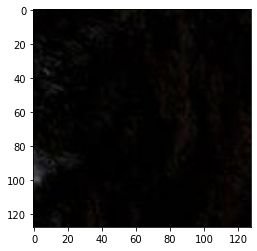

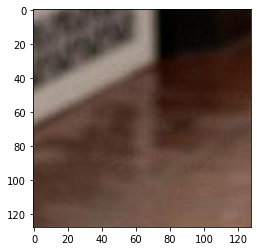

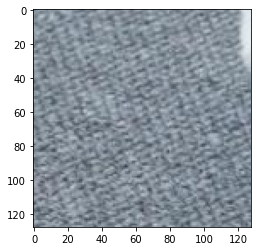

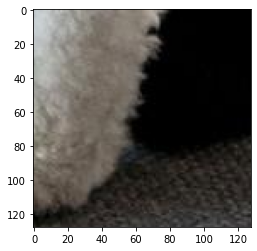

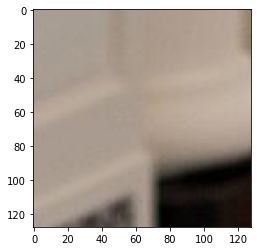

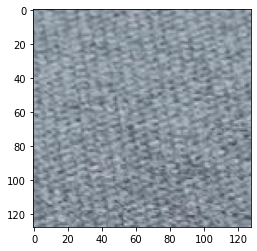

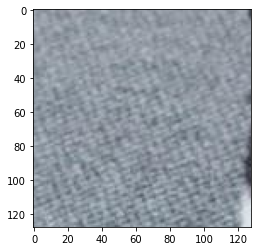

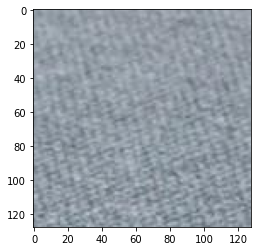

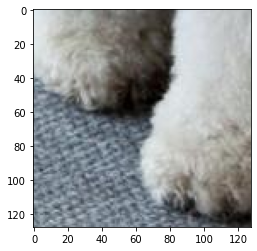

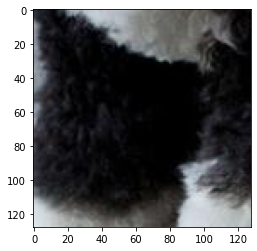

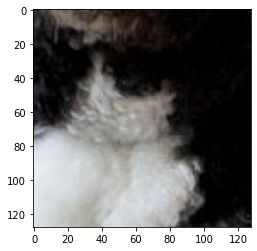

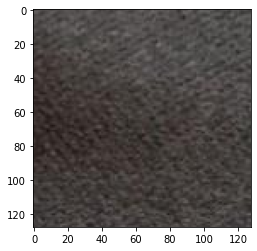

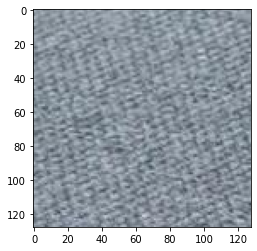

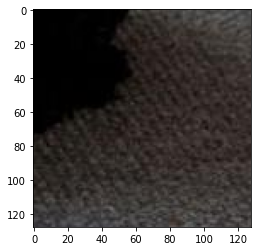

In [36]:
extract_imd(im, 128)

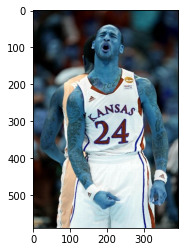

In [118]:
im1 = cv2.imread(path + '/' + df.loc[29]['image'])
plt.imshow(im1)
plt.show()

12


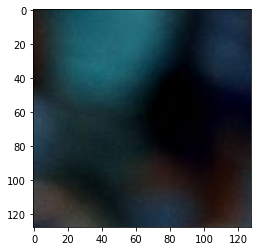

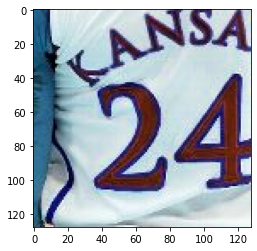

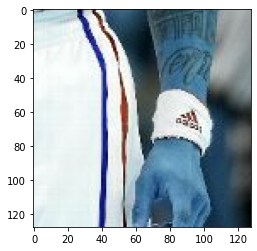

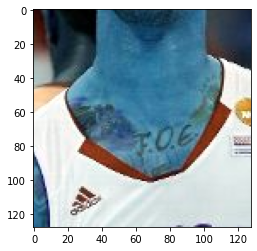

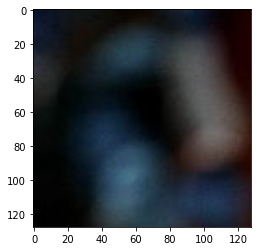

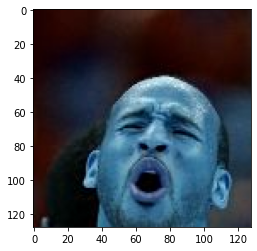

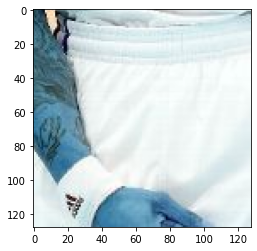

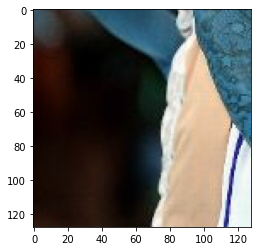

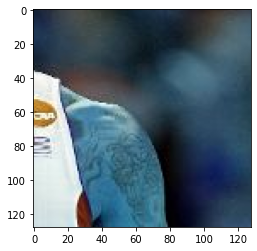

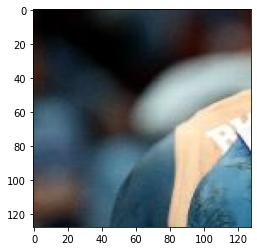

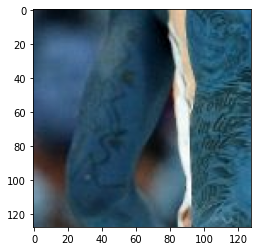

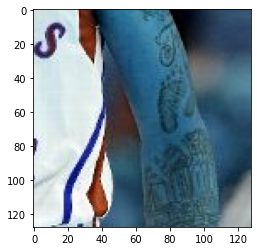

In [119]:
extract_imd(im1, 128)